In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./dataset/Jake_Gyllenhaal/0af89a2a-f252-4f0e-9613-fb2236ef32a7.jpeg')

In [3]:
img

array([[[224, 233, 247],
        [225, 234, 248],
        [225, 234, 248],
        ...,
        [168, 174, 197],
        [168, 174, 197],
        [168, 174, 197]],

       [[225, 234, 248],
        [225, 234, 248],
        [225, 234, 248],
        ...,
        [168, 174, 197],
        [168, 174, 197],
        [168, 174, 197]],

       [[225, 234, 248],
        [225, 234, 248],
        [225, 234, 248],
        ...,
        [168, 174, 197],
        [168, 174, 197],
        [168, 174, 197]],

       ...,

       [[ 41,  28,  36],
        [ 37,  27,  33],
        [ 33,  23,  29],
        ...,
        [168, 180, 204],
        [168, 180, 204],
        [168, 181, 203]],

       [[ 34,  21,  29],
        [ 30,  20,  26],
        [ 27,  17,  23],
        ...,
        [168, 180, 204],
        [168, 180, 204],
        [168, 180, 204]],

       [[ 34,  24,  30],
        [ 31,  20,  30],
        [ 28,  17,  25],
        ...,
        [168, 180, 204],
        [168, 180, 204],
        [168, 180, 204]]

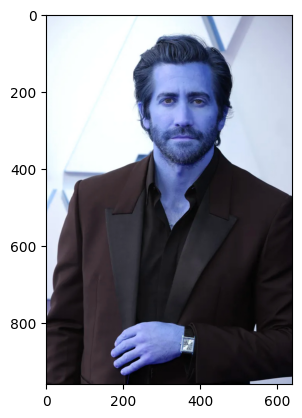

In [4]:
plt.imshow(img)

In [5]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[231, 131, 243, 243]], dtype=int32)

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(231), np.int32(131), np.int32(243), np.int32(243))

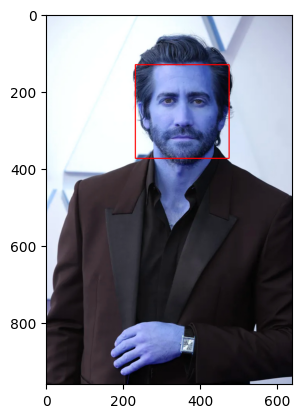

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

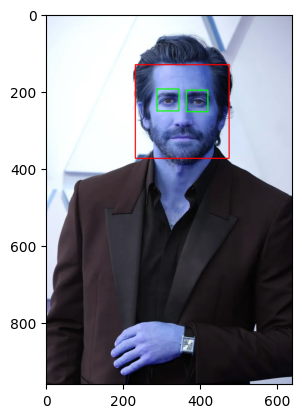

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img)
plt.show()

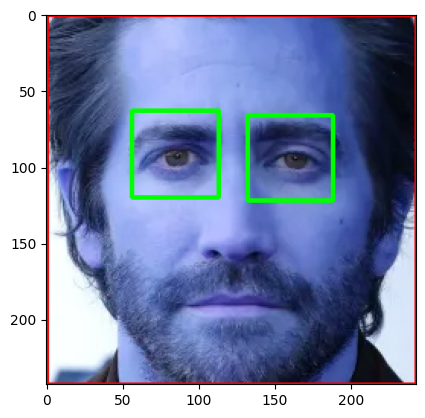

In [9]:
%matplotlib inline
plt.imshow(roi_color)

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

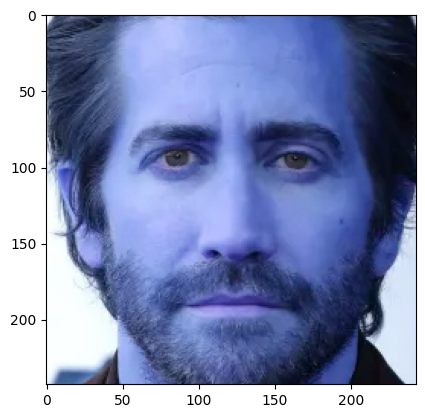

In [11]:
cropped_img = get_cropped_image_if_2_eyes('./dataset/Jake_Gyllenhaal/0af89a2a-f252-4f0e-9613-fb2236ef32a7.jpeg')
plt.imshow(cropped_img)

In [12]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped"

In [13]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        clean_path = entry.path.replace("\\","/")
        img_dirs.append(clean_path)

In [14]:
img_dirs

['./dataset/Jake_Gyllenhaal',
 './dataset/Mo_Salah',
 './dataset/Roger_Federer',
 './dataset/SZA',
 './dataset/Virat_Kohli']

In [15]:
name = img_dirs[1].split("\\")[-1]

In [16]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
cropped_img_dirs = []
celeb_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celeb_name = img_dir.split("/")[-1]
    celeb_file_name_dict[celeb_name] = []
    for entry in os.scandir(img_dir):
        roi_img = get_cropped_image_if_2_eyes(entry.path)
        if roi_img is not None:
            cropped_folder = path_to_cr_data +"/"+ celeb_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celeb_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_img)
            celeb_file_name_dict[celeb_name].append(cropped_file_path)
            count += 1 

Generating cropped images in folder:  ./dataset/cropped/Jake_Gyllenhaal
Generating cropped images in folder:  ./dataset/cropped/Mo_Salah
Generating cropped images in folder:  ./dataset/cropped/Roger_Federer
Generating cropped images in folder:  ./dataset/cropped/SZA
Generating cropped images in folder:  ./dataset/cropped/Virat_Kohli


In [18]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

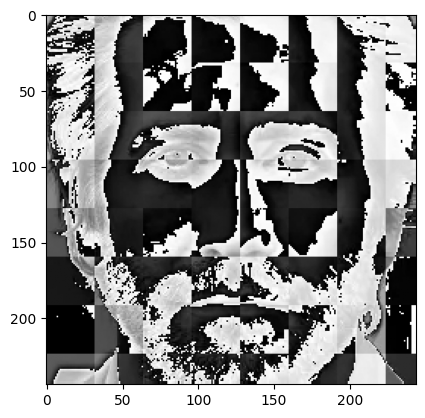

In [19]:
imgwave = w2d(cropped_img, 'db1', 5)
plt.imshow(imgwave, cmap = 'gray')

In [20]:
class_dict = {}
count = 0
for celebrity_name in celeb_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Jake_Gyllenhaal': 0,
 'Mo_Salah': 1,
 'Roger_Federer': 2,
 'SZA': 3,
 'Virat_Kohli': 4}

In [21]:
X = []
Y = []

for celeb_name, training_files in celeb_file_name_dict.items():
    for training_img in training_files:
        imgt = cv2.imread(training_img)
        if imgt is None:
            continue
        scaled_imgt = cv2.resize(imgt,(32,32))
        imgt_haar = w2d(imgt,'db1',5)
        scaled_imgt_haar = cv2.resize(imgt_haar,(32,32))
        combined_img = np.vstack((scaled_imgt.reshape(32*32*3,1),scaled_imgt_haar.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celeb_name])

In [22]:
X = np.array(X).reshape(len(X),4096).astype(float)

In [23]:
X.shape

(451, 4096)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, Y_train)
pipe.score(X_test, Y_test)

0.9292035398230089

In [26]:
print(classification_report(Y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        34
           1       0.93      0.82      0.88        17
           2       0.89      0.89      0.89        28
           3       1.00      1.00      1.00        23
           4       0.85      1.00      0.92        11

    accuracy                           0.93       113
   macro avg       0.92      0.93      0.93       113
weighted avg       0.93      0.93      0.93       113



In [27]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [28]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [29]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\arpit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\arpit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\arpit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\arpit\AppData\Local\Programs\Python\P

,model,best_score,best_params
0,svm,0.887621,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.787138,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.899429,{'logisticregression__C': 1}


In [30]:
best_estimators['svm'].score(X_test,Y_test)

0.911504424778761

In [31]:
best_clf = best_estimators['svm']

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, best_clf.predict(X_test))
cm

array([[33,  0,  0,  1,  0],
       [ 0, 12,  1,  0,  4],
       [ 3,  1, 24,  0,  0],
       [ 0,  0,  0, 23,  0],
       [ 0,  0,  0,  0, 11]])

Text(95.72222222222221, 0.5, 'Truth')

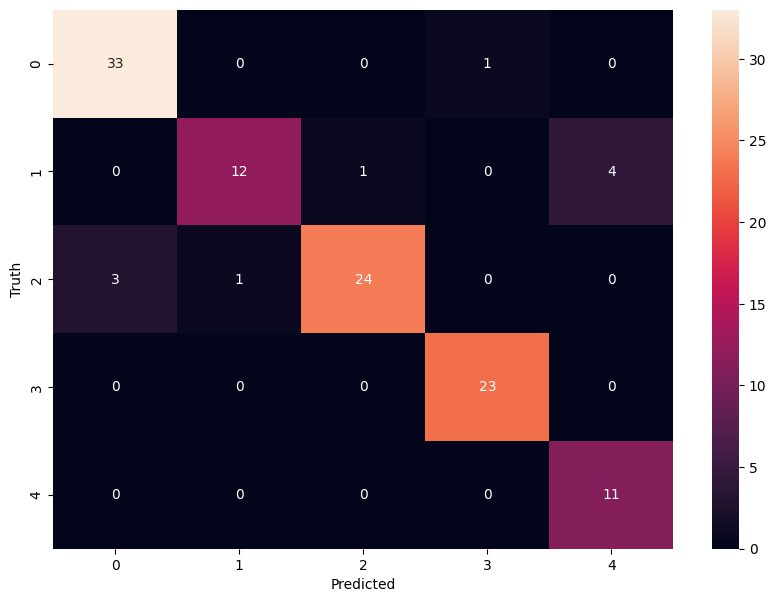

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
!pip install joblib

In [35]:
import joblib

In [36]:
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [37]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))